# House Price Accessment

In [1]:
# Importing the libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelBinarizer # one hot encoding
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import accuracy_score
import xgboost as xgb
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import *
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import cross_val_predict
import seaborn as sns

1)Read the dataset into a data table using Pandas

In [2]:
dataset=pd.read_csv('House_Pricing.csv')

In [3]:
dataset.head(3)

,year_built,stories,num_bedrooms,full_bathrooms,half_bathrooms,livable_sqft,total_sqft,garage_type,garage_sqft,carport_sqft,has_fireplace,has_pool,has_central_heating,has_central_cooling,house_number,street_name,unit_number,city,zip_code,sale_price
0,1978,1,4,1,1,1689,1859,attached,508,0,True,False,True,True,42670,Lopez Crossing,NaN,Hallfort,10907,270897.0
1,1958,1,3,1,1,1984,2002,attached,462,0,True,False,True,True,5194,Gardner Park,NaN,Hallfort,10907,302404.0
2,2002,1,3,2,0,1581,1578,none,0,625,False,False,True,True,4366,Harding Islands,NaN,Lake Christinaport,11203,2721596.0


In [4]:
dataset.dtypes

year_built               int64
stories                  int64
num_bedrooms             int64
full_bathrooms           int64
half_bathrooms           int64
livable_sqft             int64
total_sqft               int64
garage_type             object
garage_sqft              int64
carport_sqft             int64
has_fireplace             bool
has_pool                  bool
has_central_heating       bool
has_central_cooling       bool
house_number             int64
street_name             object
unit_number            float64
city                    object
zip_code                 int64
sale_price             float64
dtype: object

In [5]:
dataset.shape 

(42703, 20)

In this dataset , number of 42703 rows and 20 columns

In [6]:
list(dataset.columns)

['year_built',
 'stories',
 'num_bedrooms',
 'full_bathrooms',
 'half_bathrooms',
 'livable_sqft',
 'total_sqft',
 'garage_type',
 'garage_sqft',
 'carport_sqft',
 'has_fireplace',
 'has_pool',
 'has_central_heating',
 'has_central_cooling',
 'house_number',
 'street_name',
 'unit_number',
 'city',
 'zip_code',
 'sale_price']

2) Remove (House number,Unit number,Street Name,Zip Code) columns

In [7]:
dataset=dataset.drop(['house_number', 'unit_number','street_name','zip_code'], axis = 1) 

In [8]:
dataset.shape

(42703, 16)

After removing four columns, dataset has 16 columns only.

In [9]:
price_category=dataset['sale_price']
print('Maximum price : ',price_category.max() )
print('Minimum price : ',price_category.min())
print('Mean price :',price_category.mean())

Maximum price :  22935778.0
Minimum price :  664.0
Mean price : 441986.20551249327


3) Convert Y variable (Price) into 2 categories

In [10]:
#set up bins
bin=[664.0,441986.20551249327,22935778.0]
#use pd.cut function can attribute the values into its specific bins
# 'o' means the range between minimum and mean values, '1' means the range between mean and maximum values
category = pd.cut(price_category,bin,labels=['0','1'])  
category = category.to_frame()
#Replace an entire  sale_price and its bin
new_dataset = dataset.assign(sale_price=category)

After converting categorical varibales

In [11]:
new_dataset.head(3)

,year_built,stories,num_bedrooms,full_bathrooms,half_bathrooms,livable_sqft,total_sqft,garage_type,garage_sqft,carport_sqft,has_fireplace,has_pool,has_central_heating,has_central_cooling,city,sale_price
0,1978,1,4,1,1,1689,1859,attached,508,0,True,False,True,True,Hallfort,0
1,1958,1,3,1,1,1984,2002,attached,462,0,True,False,True,True,Hallfort,0
2,2002,1,3,2,0,1581,1578,none,0,625,False,False,True,True,Lake Christinaport,1


In [12]:
# year_built
#descriptive statistics summary
new_dataset['year_built'].describe()

count    42703.000000
mean      1990.993209
std         19.199987
min       1852.000000
25%       1980.000000
50%       1994.000000
75%       2005.000000
max       2017.000000
Name: year_built, dtype: float64

In [13]:
new_dataset['year_built'].value_counts()

2005    2046
2004    1914
2006    1720
2014    1691
2015    1671
2003    1589
1989    1324
1988    1307
2002    1233
2016    1203
2007    1126
1990    1038
2001    1017
1987     947
2000     859
1986     834
1985     830
1991     705
1978     703
1999     701
1979     687
1984     670
1980     658
2008     647
2013     598
1998     593
1981     564
1977     550
1997     524
1983     510
        ... 
1932      14
2017      12
1933      12
1913      11
1934      11
1915      10
1912      10
1906       8
1908       7
1901       6
1899       6
1905       5
1916       5
1904       5
1907       4
1917       4
1918       3
1898       2
1894       2
1902       2
1903       2
1889       1
1893       1
1895       1
1900       1
1885       1
1886       1
1891       1
1852       1
1890       1
Name: year_built, Length: 129, dtype: int64

<function seaborn.utils.despine(fig=None, ax=None, top=True, right=True, left=False, bottom=False, offset=None, trim=False)>

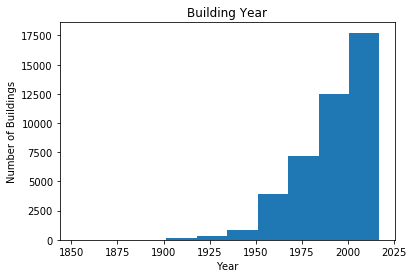

In [14]:
plt.hist(new_dataset['year_built'],bins=10)
plt.title('Building Year')
plt.xlabel('Year')
plt.ylabel('Number of Buildings')
sns.despine

Looking at the above figure, the number of buildings has been increasing  simultaenously from 1890 to 2005.

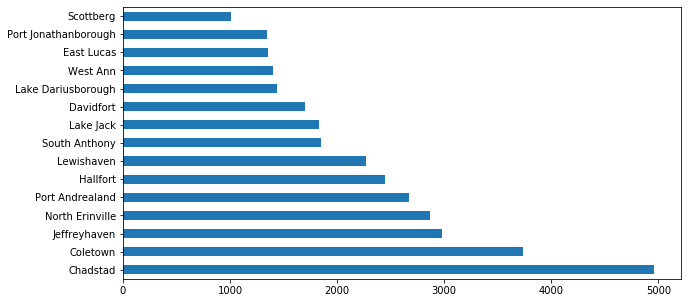

In [15]:
new_dataset['city'].value_counts().head(15).plot(kind='barh', figsize=(10,5))

Looking at the bar plot , Chadstad city has the maximum number of buildings.

Checking the relation between two variables using correlation 

In [16]:
corrmax=round(new_dataset.corr(),2)

In [17]:
top_corr_features=corrmax.index

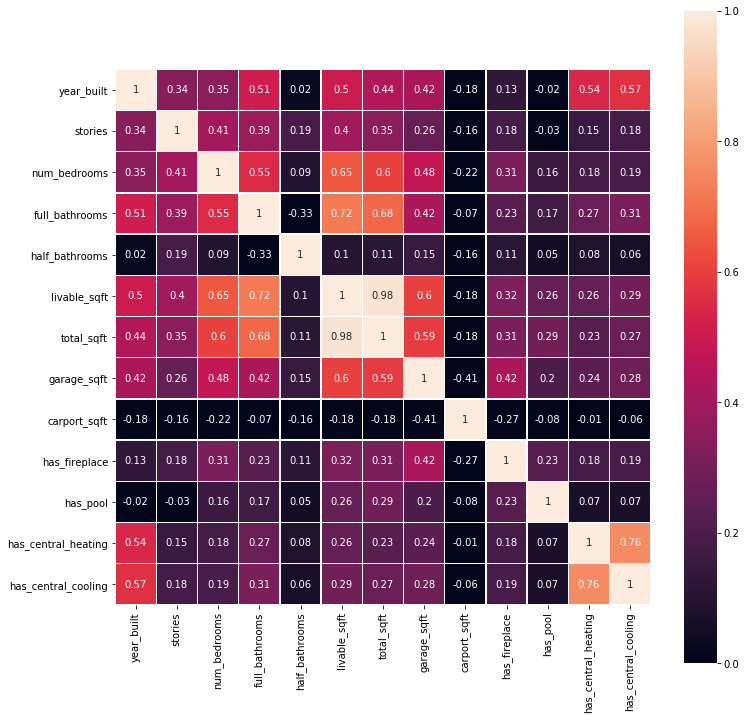

In [18]:
fig,ax=plt.subplots(figsize=(12,12))
sns.heatmap(corrmax,vmin=0,vmax=1,square=True,annot=True,linewidth=.5)

There's no strong correlation between any two variables. The strongest correlation is between total_sqft and livable_sqft features.

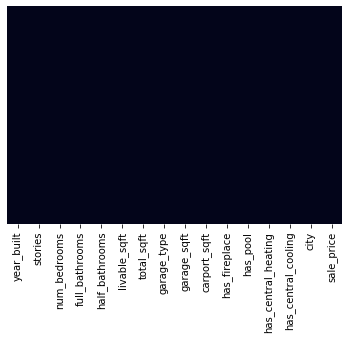

In [19]:
###Try to see how many null values have using heatmap(2-D)dimension ?
sns.heatmap(new_dataset.isnull(),yticklabels=False,cbar=False)

After checking 2-dimensional heatmap  , then no missing values 

4) Replace categorical data with one-hot encoded data(Garage type,city)

In [20]:
new_dataset['garage_type'].value_counts()  

attached    34079
none         5912
detached     2712
Name: garage_type, dtype: int64

<function seaborn.utils.despine(fig=None, ax=None, top=True, right=True, left=False, bottom=False, offset=None, trim=False)>

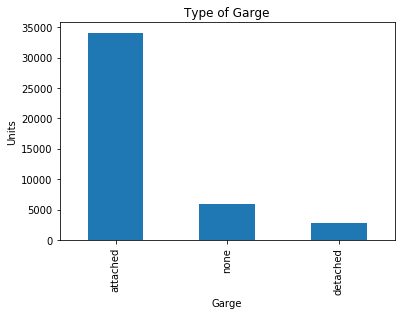

In [21]:
new_dataset['garage_type'].value_counts().plot(kind='bar')
plt.title('Type of Garge')
plt.xlabel('Garge')
plt.ylabel('Units')
sns.despine

In [22]:
# Replace categorical data with one-hot encoded data(Garage type,city)
new_dataset['garage_type']
new_dataset.groupby('garage_type').size()
# convert the data type to category
new_dataset['garage_type'] = new_dataset['garage_type'].astype('category')

In [23]:
#label encoding
new_dataset['garage_type_cat']= new_dataset['garage_type'].cat.codes

In [24]:
new_dataset.groupby(['garage_type', 'garage_type_cat']).size()

garage_type  garage_type_cat
attached     0                  34079
detached     1                   2712
none         2                   5912
dtype: int64

In [25]:
df_one_hot = new_dataset.copy()
lb = LabelBinarizer()
lb_results = lb.fit_transform(df_one_hot['garage_type'])
lb_results_df = pd.DataFrame(lb_results, columns=lb.classes_)

In [26]:
## concatenate this data to our data set
final_df = pd.concat([df_one_hot, lb_results_df], axis=1)
print('original df dimensions:', new_dataset.shape)
print('one hot encoded df dimensions:', final_df.shape)

original df dimensions: (42703, 17)
one hot encoded df dimensions: (42703, 20)


In [27]:
# Replace categorical data with one-hot encoded data(city)
final_df['city']
final_df.groupby('city').size()
# convert the data type to category
final_df['city'] = final_df['city'].astype('category')

In [28]:
#label encoding
final_df['city_cat']= final_df['city'].cat.codes

In [29]:
final_df.groupby(['city', 'city_cat']).size()

city                  city_cat
Amystad               0            561
Brownport             1            209
Chadstad              2           4962
Clarkberg             3            174
Coletown              4           3739
Davidfort             5           1703
Davidtown             6             18
East Amychester       7            792
East Janiceville      8            248
East Justin           9            112
East Lucas            10          1359
Fosterberg            11            26
Hallfort              12          2448
Jeffreyhaven          13          2981
Jenniferberg          14           275
Joshuafurt            15           745
Julieberg             16             6
Justinport            17           272
Lake Carolyn          18           637
Lake Christinaport    19           833
Lake Dariusborough    20          1441
Lake Jack             21          1831
Lake Jennifer         22            83
Leahview              23            27
Lewishaven            24         

In [30]:
# one hot encoding
df_one_hot = final_df.copy()
lb = LabelBinarizer()
lb_results = lb.fit_transform(df_one_hot['city'])
lb_results_df = pd.DataFrame(lb_results, columns=lb.classes_)
lb_results_df.head()
# concatenate this data to our data set
final_dataset = pd.concat([final_df, lb_results_df], axis=1)

In [31]:
print('original df dimensions:', dataset.shape)
print('one hot encoded df dimensions:', final_dataset.shape)

original df dimensions: (42703, 16)
one hot encoded df dimensions: (42703, 68)


In [32]:
df=final_dataset.drop(['garage_type', 'city'], axis=1)  # dropping city and garage_type columns

In [33]:
# Check for Missing Values in Dataset
df.isnull().any()

year_built              False
stories                 False
num_bedrooms            False
full_bathrooms          False
half_bathrooms          False
livable_sqft            False
total_sqft              False
garage_sqft             False
carport_sqft            False
has_fireplace           False
has_pool                False
has_central_heating     False
has_central_cooling     False
sale_price               True
garage_type_cat         False
attached                False
detached                False
none                    False
city_cat                False
Amystad                 False
Brownport               False
Chadstad                False
Clarkberg               False
Coletown                False
Davidfort               False
Davidtown               False
East Amychester         False
East Janiceville        False
East Justin             False
East Lucas              False
                        ...  
Justinport              False
Lake Carolyn            False
Lake Chris

find out null values in sale column

In [34]:
#missing values in sale_price column
df.dropna(axis=0, how='any', inplace=True)

In [35]:
df.shape

(42699, 66)

In [36]:
#descriptive statistics summary
df['sale_price'].describe()

count     42699
unique        2
top           0
freq      25089
Name: sale_price, dtype: object

In [37]:
df['sale_price'].value_counts()

0    25089
1    17610
Name: sale_price, dtype: int64

<function seaborn.utils.despine(fig=None, ax=None, top=True, right=True, left=False, bottom=False, offset=None, trim=False)>

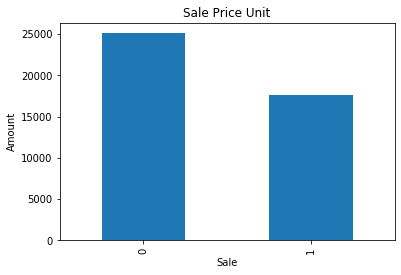

In [38]:
df['sale_price'].value_counts().plot(kind='bar')
plt.title('Sale Price Unit')
plt.xlabel('Sale')
plt.ylabel('Amount')
sns.despine

5) Create the X and y arrays

In [39]:
df_Train=df.iloc[1000:,:] #copying all columns inside df_train
X=df_Train.drop(['sale_price'],axis=1) # dropping sale_price column
y = df.loc[1000:, 'sale_price'].values

6) Split the data set in a training set (70%) and a test set (30%)

In [40]:
X_train, X_test, Y_train, Y_test = train_test_split(X, y, test_size=0.3, random_state=0)

# Feature Scaling

In [41]:
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

# 7) Define a model, using Random Forest and Gradient Boosting Classifier

# Random Forest Classifier

In [42]:
random_classifier=RandomForestClassifier(
            max_depth=6, max_features=1.0, 
            min_samples_leaf=17,
            n_estimators=500, n_jobs=-1, random_state=0,
            )

In [43]:
random_classifier.fit(X_train,Y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=6, max_features=1.0, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=17, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=500,
                       n_jobs=-1, oob_score=False, random_state=0, verbose=0,
                       warm_start=False)

In [44]:
#Predicting the test set results
y_pred = random_classifier.predict(X_test)

In [45]:
y_pred

array(['0', '1', '0', ..., '0', '0', '0'], dtype=object)

In [46]:
#Accuray Score
accuaracy=accuracy_score(Y_test, y_pred)
print("Random Forest Classifier : %.2f%% "%(accuaracy*100.0))

Random Forest Classifier : 88.30% 


In [47]:
print("Confusion Matrix:")
print(confusion_matrix(Y_test, y_pred))

print("Classification Report")
print(classification_report(Y_test, y_pred))

Confusion Matrix:
[[6682  660]
 [ 804 4364]]
Classification Report
              precision    recall  f1-score   support

           0       0.89      0.91      0.90      7342
           1       0.87      0.84      0.86      5168

    accuracy                           0.88     12510
   macro avg       0.88      0.88      0.88     12510
weighted avg       0.88      0.88      0.88     12510



# Random Forest Classifier  Using GridSearch

In [48]:
param_grid = {
    'bootstrap': [True],
    'max_depth': [6],
    'max_features': [1.0],
    'min_samples_leaf': [17],
    'criterion': ['gini'],
    'n_estimators': [500],
    'random_state':[0],
}

In [49]:
random_classifier_ = RandomForestClassifier()

In [50]:
random_gridsearch = GridSearchCV(random_classifier_, param_grid=param_grid, n_jobs=-1, cv= 2,
                   scoring='accuracy')

In [51]:
random_gridsearch.fit(X_train,Y_train)

GridSearchCV(cv=2, error_score='raise-deprecating',
             estimator=RandomForestClassifier(bootstrap=True, class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators='warn', n_jobs=None,
                                              oob_score=False,
                                              random_state=None, verbose=0,
                                              warm_start=False),
             iid

In [52]:
best_parameters = random_gridsearch.best_params_
print(best_parameters)

{'bootstrap': True, 'criterion': 'gini', 'max_depth': 6, 'max_features': 1.0, 'min_samples_leaf': 17, 'n_estimators': 500, 'random_state': 0}


In [53]:
best_result = random_gridsearch.best_score_
print("Score of Random Forest Classifier Using GridSearchCV : %.2f%% " %(best_result*100.0))

Score of Random Forest Classifier Using GridSearchCV : 87.53% 


In [54]:
#Predicting the test set results
y_pred_gridsearch = random_gridsearch.predict(X_test)

In [55]:
y_pred_gridsearch

array(['0', '1', '0', ..., '0', '0', '0'], dtype=object)

In [56]:
#Accuray Score
accuaracy=accuracy_score(Y_test, y_pred_gridsearch)
print("Accuracy of Random Forest Classifier Using GridSearchCV: %.2f%% "%(accuaracy*100.0))

Accuracy of Random Forest Classifier Using GridSearchCV: 88.30% 


In [57]:
print("Confusion Matrix:")
print(confusion_matrix(Y_test, y_pred_gridsearch))

print("Classification Report")
print(classification_report(Y_test, y_pred_gridsearch))

Confusion Matrix:
[[6682  660]
 [ 804 4364]]
Classification Report
              precision    recall  f1-score   support

           0       0.89      0.91      0.90      7342
           1       0.87      0.84      0.86      5168

    accuracy                           0.88     12510
   macro avg       0.88      0.88      0.88     12510
weighted avg       0.88      0.88      0.88     12510



# Gradient Boosting Classifier Model

In [58]:
gb_clf = GradientBoostingClassifier(n_estimators=500, learning_rate=0.2, max_features=1.0, max_depth=6, random_state=0)

In [ ]:
gb_clf.fit(X_train,Y_train)

In [ ]:
gb_y_pred = gb_clf.predict(X_test)

In [ ]:
print("Confusion Matrix:")
print(confusion_matrix(Y_test, gb_y_pred))

print("Classification Report")
print(classification_report(Y_test, gb_y_pred))

In [ ]:
# Accuray Score
accuaracy=accuracy_score(Y_test, gb_y_pred)
print("Accuracy Score of Gradient Boosting Classifier : %.2f%% "%(accuaracy*100.0))

# Gradient Boosting Classifier Model Using GridSearch

In [ ]:
parameters={
 'learning_rate':[0.1],
 'max_depth': [6],
 'max_features': [1.0],
 'min_samples_leaf': [5],
 'min_samples_split': [12],
 'n_estimators': [500],
  'random_state':[0]
}

In [ ]:
gb_clf = GradientBoostingClassifier()

In [ ]:
gb_gridsearch = GridSearchCV(gb_clf,parameters, n_jobs=-1, 
                   cv=2, 
                   scoring='accuracy',
                   verbose=2, refit=True)

In [ ]:
gb_gridsearch.fit(X_train, Y_train)   

In [ ]:
best_parameters = gb_gridsearch.best_params_
print(best_parameters)

In [ ]:
best_result = gb_gridsearch.best_score_
print("Score of Gradient Boosting Classifier Using GridSearchCV : %.2f%% " %(best_result*100.0))

In [ ]:
gb_gridsearch_y_pred = gb_gridsearch.predict(X_test)

In [ ]:
gb_gridsearch_y_pred

In [ ]:
print("Confusion Matrix:")
print(confusion_matrix(Y_test, gb_gridsearch_y_pred))

print("Classification Report")
print(classification_report(Y_test, gb_gridsearch_y_pred))

In [ ]:
# Accuray Score
accuaracy=accuracy_score(Y_test, gb_gridsearch_y_pred)
print("Accuracy of Gradient Boosting Classifier Using GridSearchCV : %.2f%% "%(accuaracy*100.0))

# XGBoost Classifier

In [ ]:
xgb_model = xgb.XGBClassifier(n_estimators=500, learning_rate=0.2, max_features=1.0, max_depth=6, random_state=0)

In [ ]:
xgb_model.fit(X_train, Y_train)

In [ ]:
xgb_y_pred=xgb_model.predict(X_test)

In [ ]:
print("Confusion Matrix:")
print(confusion_matrix(Y_test, xgb_y_pred))

print("Classification Report")
print(classification_report(Y_test, xgb_y_pred))

In [ ]:
# Accuray Score
accuaracy=accuracy_score(Y_test, xgb_y_pred)
print("Accuracy of XGBoost Classifier : %.2f%% "%(accuaracy*100.0))

# XGboost Classifier Using GridSearch

In [ ]:
xgb_model = xgb.XGBClassifier()

param = {
    "learning_rate": [0.2],
    "max_depth":[6],
    "min_samples_leaf":[3],
    "max_features":[1.0],
    "n_estimators":[500],
    "random_state":[0]
    }

xg_clf_gridsearch = GridSearchCV(xgb_model, param_grid=param, n_jobs=-1, 
                   cv=2, 
                   scoring='accuracy',
verbose=2, refit=True)

In [ ]:
xg_clf_gridsearch.fit(X_train, Y_train)

In [ ]:
best_parameters = xg_clf_gridsearch.best_params_
print(best_parameters)

In [ ]:
best_result = xg_clf_gridsearch.best_score_
print("Score of XGBoost Classifier Using GridSearchCV : %.2f%% " %(best_result*100.0))

In [ ]:
xgb_gridsearch_y_pred=xg_clf_gridsearch.predict(X_test)

In [ ]:
print("Confusion Matrix:")
print(confusion_matrix(Y_test, xgb_gridsearch_y_pred))

print("Classification Report")
print(classification_report(Y_test, xgb_gridsearch_y_pred))

In [ ]:
# Accuray Score
xgcv_accuracy=accuracy_score(Y_test, xgb_gridsearch_y_pred)
print("Accuracy of XGBoost Classifier Using GridsearchCV : %.2f%% "%(accuaracy*100.0))

11)  Save the trained model to a file so we can use it in other programs using joblib.dump

In [ ]:
from sklearn.externals import joblib

In [ ]:
joblib.dump(xg_clf_gridsearch,'xgboost_model')

In [ ]:
load_model=joblib.load('xgboost_model')

In [ ]:
load_model

12)  Find the error rate on the training set

In [ ]:
training_error=1-(xg_clf_gridsearch.score(X_train, Y_train))

In [ ]:
training_error

13) Find the error rate on the training set

In [ ]:
test_errors=1-xgcv_accuracy

In [ ]:
test_errors

14) Try to give some real values in a list and predict them by loading the file you have saved

In [ ]:
# Future prediction valuefor 1 
future_pred=xg_clf_gridsearch.predict([0.0,100.0,200.0,300.0,400.0,500.0,600.0,700.0,800.0,900.0,1000.0,1100.0,1200.0,1300.0,1400.0,1500.0,1600.0,1700.0,1800.0,1900.0,2000.0,2100.0,2200.0,2300.0,2400.0,2500.0,2600.0,2700.0,2800.0,2900.0,3000.0,3100.0,3200.0,3300.0,3400.0,3500.0,3600.0,3700.0,3800.0,3900.0,4000.0,4100.0,4200.0,4300.0,4400.0,4500.0,4600.0,4700.0,4700.0,4700.0,4700.0,4700.0,4700.0,4700.0,4700.0,4700.0,4700.0,4700.0,4700.0,4700.0,4700.0,4700.0,4700.0,4700.0,4700.0])

In [ ]:
future_pred   

In [ ]:
#Future prediction value for 0

future_pred=xg_clf_gridsearch.predict([0.0,12000.0,1100.0,0.0,1400.0,0.0,0.0,1200.0,1800.0,1500.0,0.0,0.0,1600.0,12000.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1600.0,1600.0,1700.0,2.0,0.0,1100.0,0.0,0.0,1400.0,0.0,1600.0,0.0,1200.0,0.0,1200.0,0.0,1500.0,0.0,1300.0,0.0,1700.0,1200.0,0.0,120.0,1220.0,1500.0,4700.0,0.0,0.0,4700.0,4700.0,4700.0,4700.0,4700.0,4700.0,4700.0,4700.0,4700.0,4700.0])

In [ ]:
future_pred